In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt

In [2]:
iris_data=pd.read_csv("Iris.csv")

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# checking null values
iris_data.isnull().sum().sort_values(ascending=False)

Species          0
PetalWidthCm     0
PetalLengthCm    0
SepalWidthCm     0
SepalLengthCm    0
Id               0
dtype: int64

In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Plotting 'SepalLengthCm'

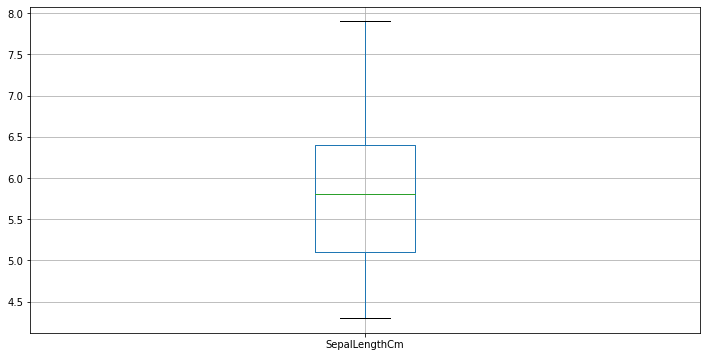

In [6]:
#There is no outlier as per boxplot
iris_data.boxplot('SepalLengthCm', figsize=(12,6))

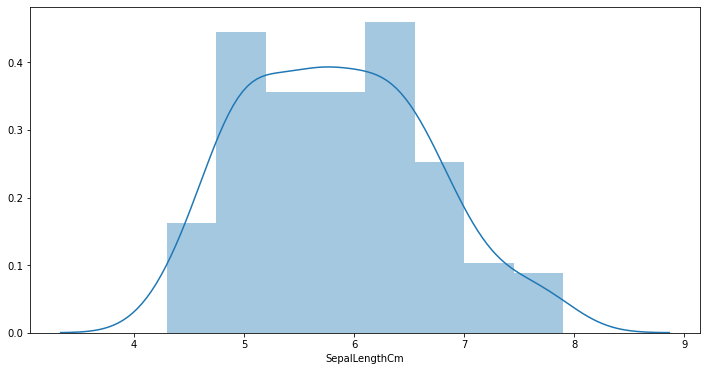

In [7]:
#We can see there is a pattern or segments of high peaks
plt.figure(figsize=(12,6))
sns.distplot(iris_data['SepalLengthCm'])
plt.show()

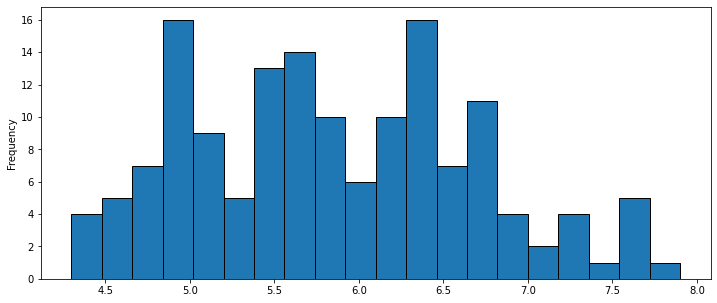

In [8]:
iris_data['SepalLengthCm'].plot.hist(bins=20, edgecolor='k',figsize=(12,5))

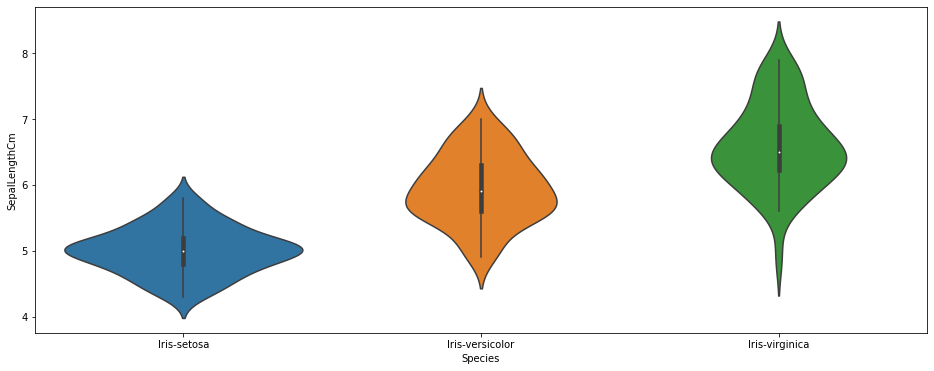

In [9]:
# We can see that "SepalLength" of Iris viginica is more than Iris-versicolor and Iris setosa
plt.figure(figsize=(16,6))
sns.violinplot(x='Species', y='SepalLengthCm', split=True, data=iris_data)

# Plotting Sepal width "SepalWidthCm"

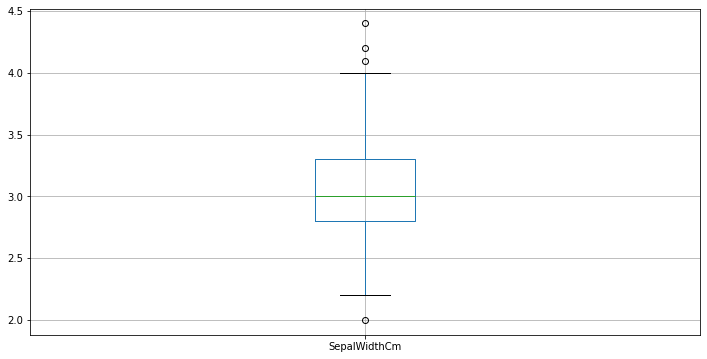

In [10]:
#There are few outlier as per boxplot
iris_data.boxplot('SepalWidthCm', figsize=(12,6))

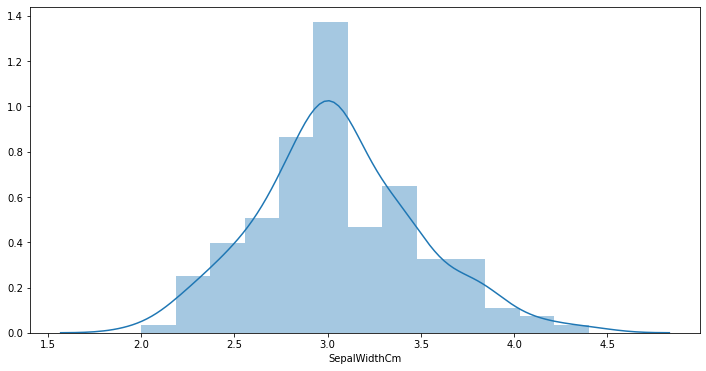

In [11]:
plt.figure(figsize=(12,6))
sns.distplot(iris_data['SepalWidthCm'])
plt.show()

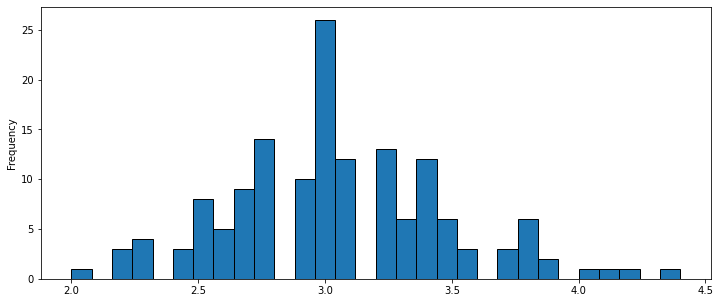

In [12]:
iris_data['SepalWidthCm'].plot.hist(bins=30, edgecolor='k',figsize=(12,5))

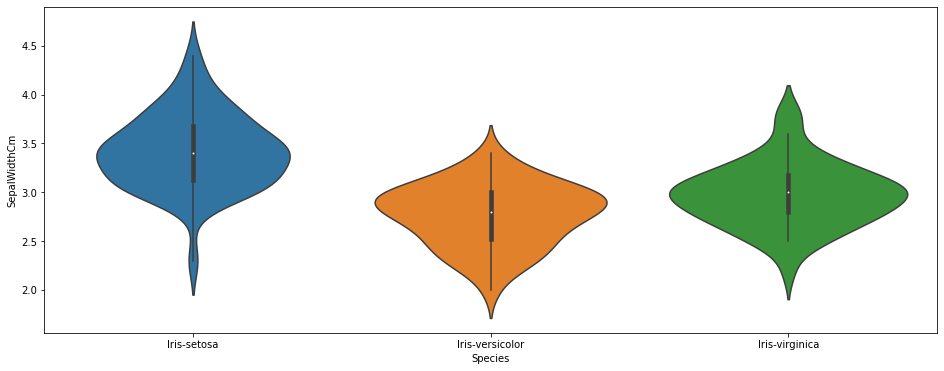

In [13]:
# We can see that "SepalWidthCm" of Iris setos is more than Iris setosa and Iris-versicolor
plt.figure(figsize=(16,6))
sns.violinplot(x='Species', y='SepalWidthCm', split=True, data=iris_data)

# Plotting Petal length "PetalLengthCm"

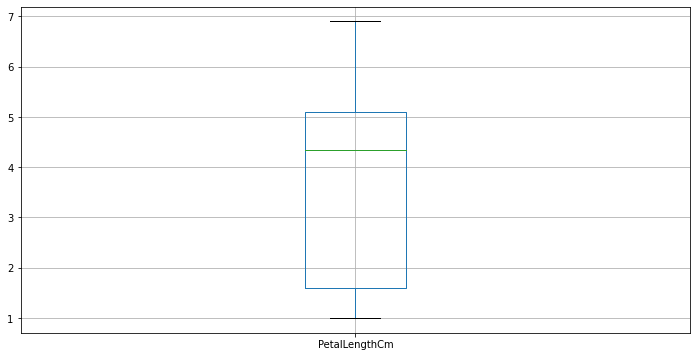

In [14]:
#There are no outlier as per boxplot
iris_data.boxplot('PetalLengthCm', figsize=(12,6))

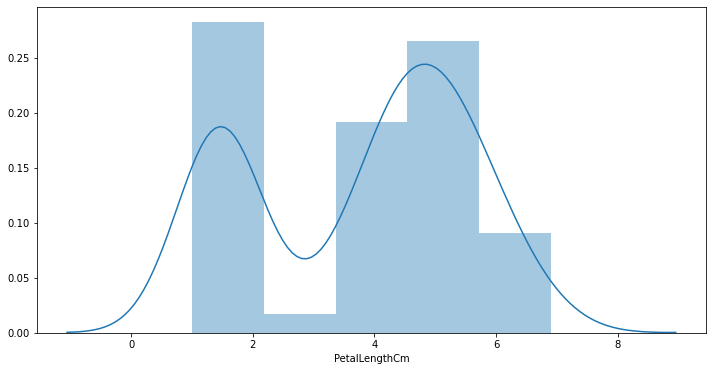

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(iris_data['PetalLengthCm'])
plt.show()

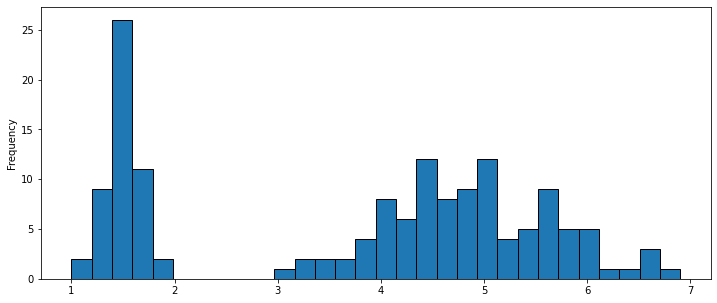

In [16]:
iris_data['PetalLengthCm'].plot.hist(bins=30, edgecolor='k',figsize=(12,5))

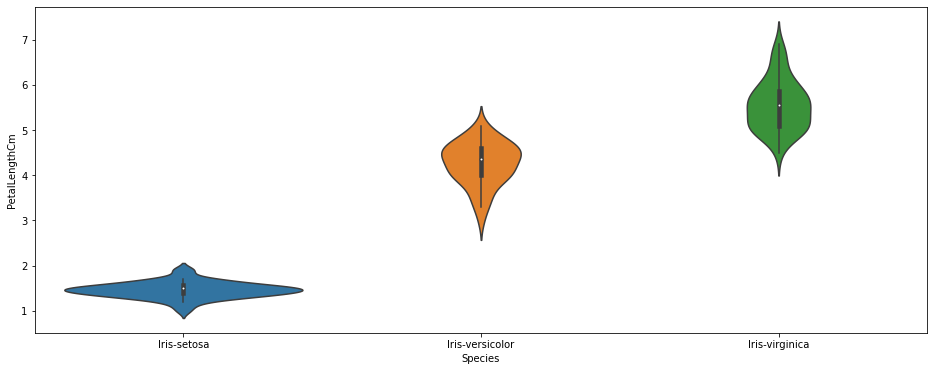

In [17]:
# We can see that "SepalWidthCm" of Iris setosa is very small in height than Iris-versicolor and Iris setosa
plt.figure(figsize=(16,6))
sns.violinplot(x='Species', y='PetalLengthCm', split=True, data=iris_data)

# Plotting Petal width "PetalWidthCm"

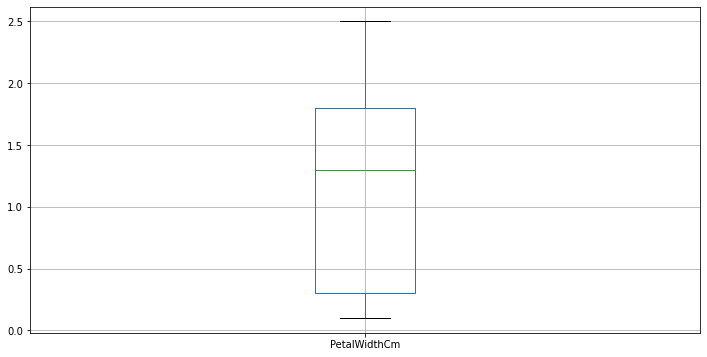

In [18]:
#There are no outlier as per boxplot
iris_data.boxplot('PetalWidthCm', figsize=(12,6))

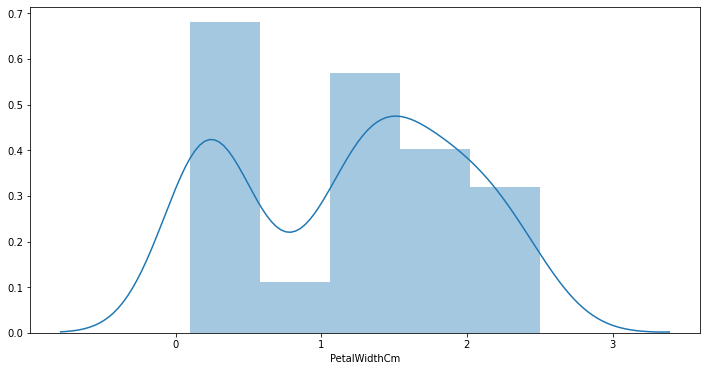

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(iris_data['PetalWidthCm'])
plt.show()

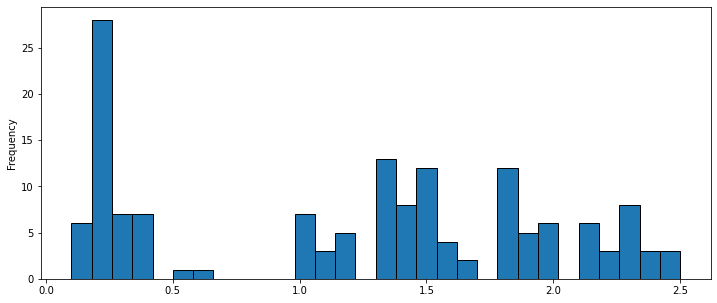

In [20]:
iris_data['PetalWidthCm'].plot.hist(bins=30, edgecolor='k',figsize=(12,5))

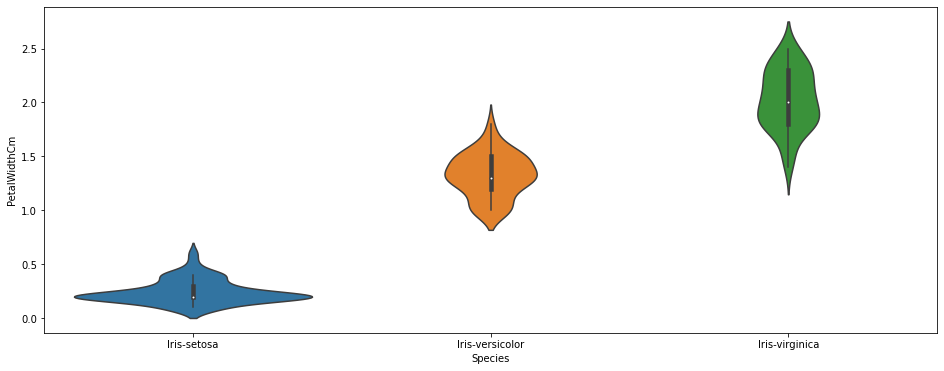

In [21]:
# We can see that "PetalWidthCm" of Iris setosa is very small in height than Iris-versicolor and Iris setosa
plt.figure(figsize=(16,6))
sns.violinplot(x='Species', y='PetalWidthCm', split=True, data=iris_data)

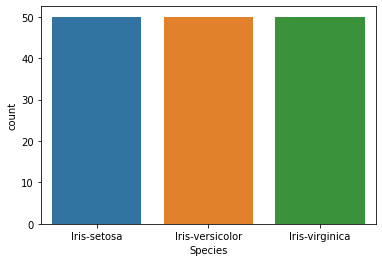

In [22]:
#all categores re equally spread.
sns.countplot(iris_data['Species']);

In [23]:
iris_data[['Species', 'SepalLengthCm']].groupby(['Species'], as_index=False).mean().sort_values(by='SepalLengthCm', ascending=False)

,Species,SepalLengthCm
2,Iris-virginica,6.588
1,Iris-versicolor,5.936
0,Iris-setosa,5.006


In [24]:
iris_data[['Species', 'SepalWidthCm']].groupby(['Species'], as_index=False).mean().sort_values(by='SepalWidthCm', ascending=False)

,Species,SepalWidthCm
0,Iris-setosa,3.418
2,Iris-virginica,2.974
1,Iris-versicolor,2.770


In [25]:
iris_data[['Species', 'PetalLengthCm']].groupby(['Species'], as_index=False).mean().sort_values(by='PetalLengthCm', ascending=False)

,Species,PetalLengthCm
2,Iris-virginica,5.552
1,Iris-versicolor,4.260
0,Iris-setosa,1.464


In [26]:
iris_data[['Species', 'PetalWidthCm']].groupby(['Species'], as_index=False).mean().sort_values(by='PetalWidthCm', ascending=False)

,Species,PetalWidthCm
2,Iris-virginica,2.026
1,Iris-versicolor,1.326
0,Iris-setosa,0.244


In [27]:
iris_data=iris_data.drop(['Id'], axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


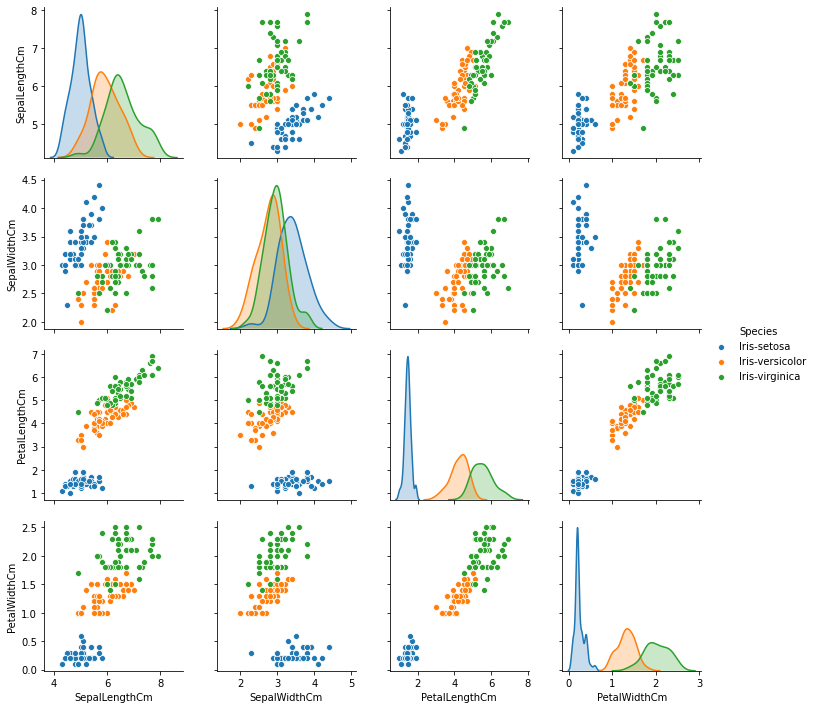

In [28]:
sns.pairplot(iris_data,kind="scatter",hue="Species")
plt.show()
#if we use king='reg', we get regression line

# scatter plot of all combination of features

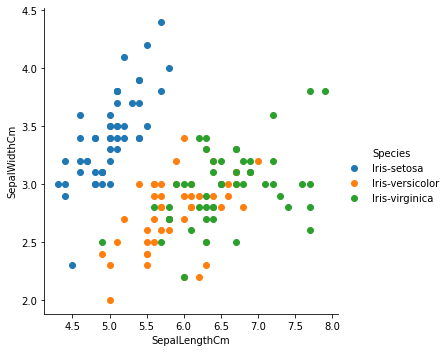

In [29]:
#Plotting between "SepalLengthCm" and "SepalWidthCm"
sns.FacetGrid(iris_data, hue ="Species",height = 5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
#Iris-Setosa is easily seprable from Iris-Versicolor and Iris-Virginica while Iris-Versicolor and Iris-Virginica are not easily seprable
# There is a general trend for Iris-Setosa and Iris versicolor of +ve correlation
#Sepalwidth increses as sepal length increses for Iris-Setosa and Iris versicolor

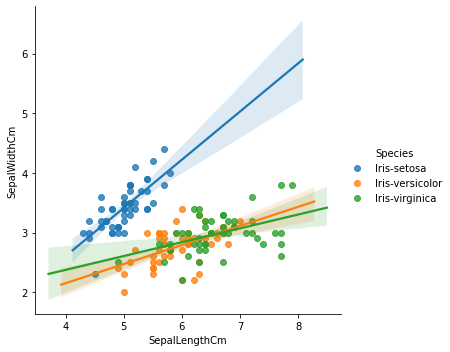

In [30]:
# To plot regression lines
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=iris_data);

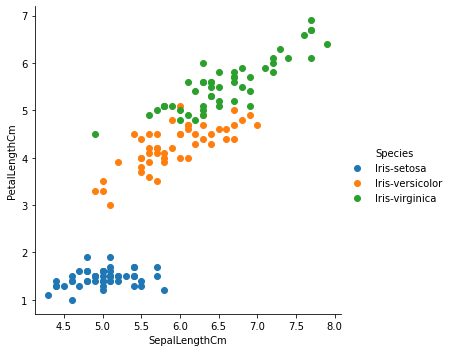

In [31]:
# Plotting between "SepalLengthCm", "PetalLengthCm"
sns.FacetGrid(iris_data, hue ="Species",height = 5).map(plt.scatter, "SepalLengthCm", "PetalLengthCm").add_legend()
# Iris-Setosa is easily seprable from Iris-Versicolor and Iris-Virginica while Iris-Versicolor and Iris-Virginica are seprable some datapoints
#There is a general trend for Iris-virginica and Iris versicolor of +ve correlation

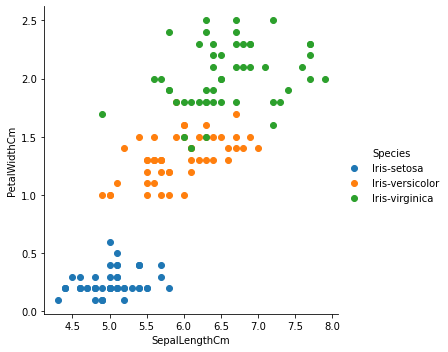

In [32]:
# Plotting between "SepalLengthCm", "PetalLengthCm"
sns.FacetGrid(iris_data, hue ="Species",height = 5).map(plt.scatter, "SepalLengthCm", "PetalWidthCm").add_legend()
# Iris-Setosa is easily seprable from Iris-Versicolor and Iris-Virginica while Iris-Versicolor and Iris-Virginica are seprable with some datapoints

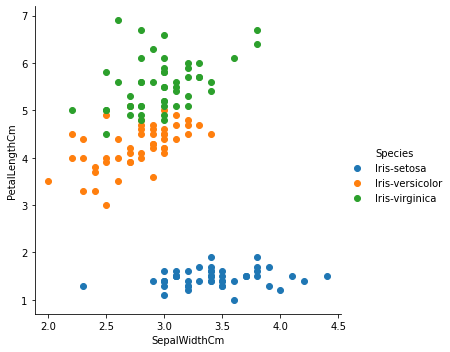

In [33]:
# Plotting between "SepalLengthCm", "PetalLengthCm"
sns.FacetGrid(iris_data, hue ="Species",height = 5).map(plt.scatter, "SepalWidthCm", "PetalLengthCm").add_legend()
# Iris-Setosa is easily seprable from Iris-Versicolor and Iris-Virginica while Iris-Versicolor and Iris-Virginica are seprable with  some datapoints

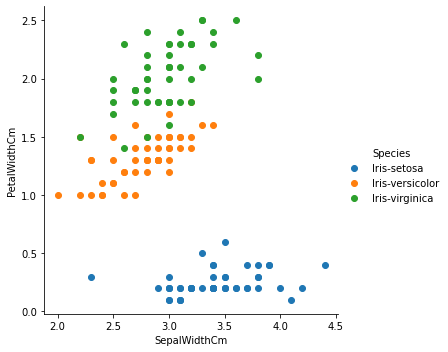

In [34]:
# Plotting between "SepalLengthCm", "PetalLengthCm"
sns.FacetGrid(iris_data, hue ="Species",height = 5).map(plt.scatter, "SepalWidthCm", "PetalWidthCm").add_legend()
# Iris-Setosa is easily seprable from Iris-Versicolor and Iris-Virginica while Iris-Versicolor and Iris-Virginica are seprable with some datapoints

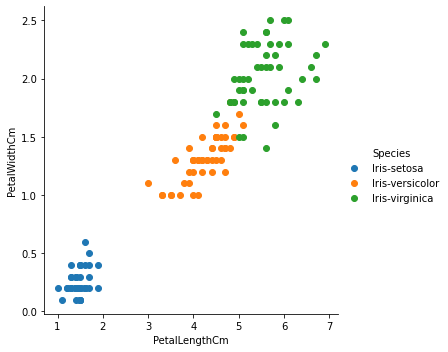

In [35]:
# Plotting between "SepalLengthCm", "PetalLengthCm"
sns.FacetGrid(iris_data, hue ="Species",height = 5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()
# Iris-Setosa is easily seprable from Iris-Versicolor and Iris-Virginica while Iris-Versicolor and Iris-Virginica are seprable  some datapoints

# Train test Split


In [36]:
X_Iris = iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_Iris = iris_data['Species']

In [37]:
X_Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
y_Iris.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X_Iris, y_Iris, test_size=0.2, random_state=100)

In [47]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
99,5.7,2.8,4.1,1.3
119,6.0,2.2,5.0,1.5
12,4.8,3.0,1.4,0.1
16,5.4,3.9,1.3,0.4


# Building Model

In [48]:
model_dt_5 = DecisionTreeClassifier(random_state=5, criterion = "gini")
model_dt_5.fit(X_train, y_train)
model_dt_5_score_train = model_dt_5.score(X_train, y_train)
print("Training score: ",model_dt_5_score_train)
model_dt_5_score_test = model_dt_5.score(X_test, y_test)
print("Testing score: ",model_dt_5_score_test)

Training score:  1.0
Testing score:  0.9666666666666667


In [50]:
predictions = model_dt_5.predict(X_test)

In [56]:
print (confusion_matrix(y_test, predictions))

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


In [62]:
 print(classification_report(y_test, predictions)) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Logistic regression

In [72]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=3)
# fit the model with data
logreg.fit(X_train,y_train)

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=3)

In [73]:
y_Logistic_pred=logreg.predict(X_test)

# Performance & Accuracy

In [74]:
y_Logistic_pred_score_train = logreg.score(X_train, y_train)
print("Training score: ",y_Logistic_pred_score_train)
y_Logistic_pred_score_test = logreg.score(X_test, y_Logistic_pred)
print("Testing score: ",y_Logistic_pred_score_test)

Training score:  0.975
Testing score:  1.0


In [75]:
print (confusion_matrix(y_test, y_Logistic_pred))

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


In [76]:
 print(classification_report(y_test, y_Logistic_pred)) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

